In [9]:
!pip install mne
import mne
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 40.0 MB/s eta 0:00:00


Extracting EDF parameters from /content/chb07_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-b25b8b318e6f>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('chb07_01.edf')


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2068-09-04 16:58:28 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>
[[ 1.50427350e-05  1.95360195e-07  1.95360195e-07  1.95360195e-07
   5.86080586e-07  1.95360195e-07 -2.14896215e-06 -9.76800977e-07
   4.10256410e-06  1.75824176e-06]
 [-5.76312576e-05  1.95360195e-07  1.95360195e-07  1.95360195e-07
   1.36752137e-06  1.95360195e-07 -1.75824176e-06 -9.76800977e-07
  -1.95360195e-07 -2.53968254e-06]
 [ 6.34920635e-05  1.95360195e-07  1.95360195e-07  1.95360195e-07
  -5.86080586e-07 -9.76800977e-07  5.86080586e-07  3.32112332e-06
   2.14896215e-06 -5.86080586e-07]
 [ 1.73870574e-05  1.95360195e-07  1.95360195e-07  1.95360195e-07
  -1.95360195e-07 -1.36752137e-06  1.95360195e-07  2.93040293e-06
   1.36752137e-06 -2.93040293e-06]
 [ 3.69230769e-05  1.95360195e-07  1.95

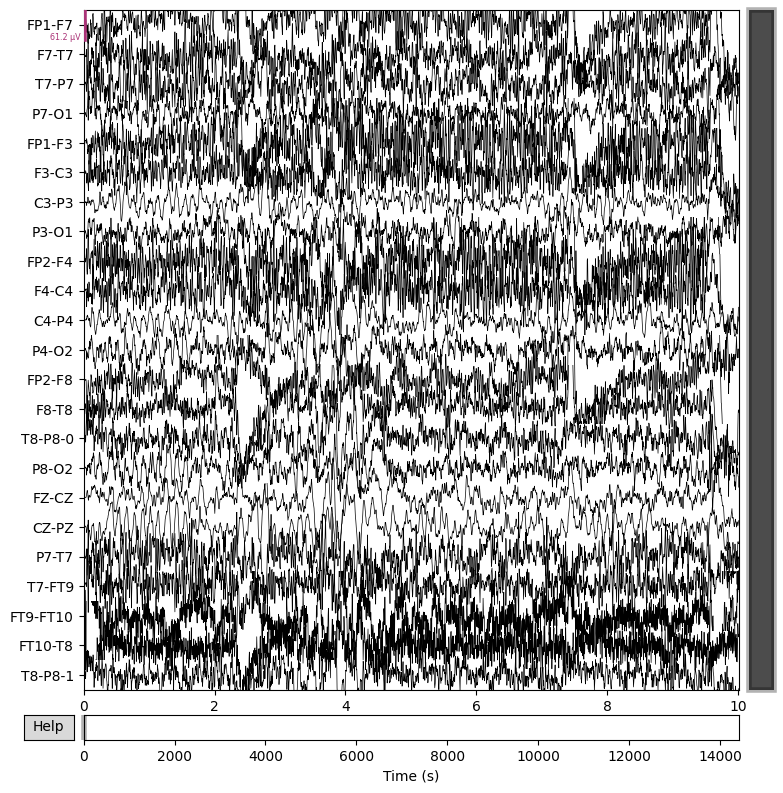

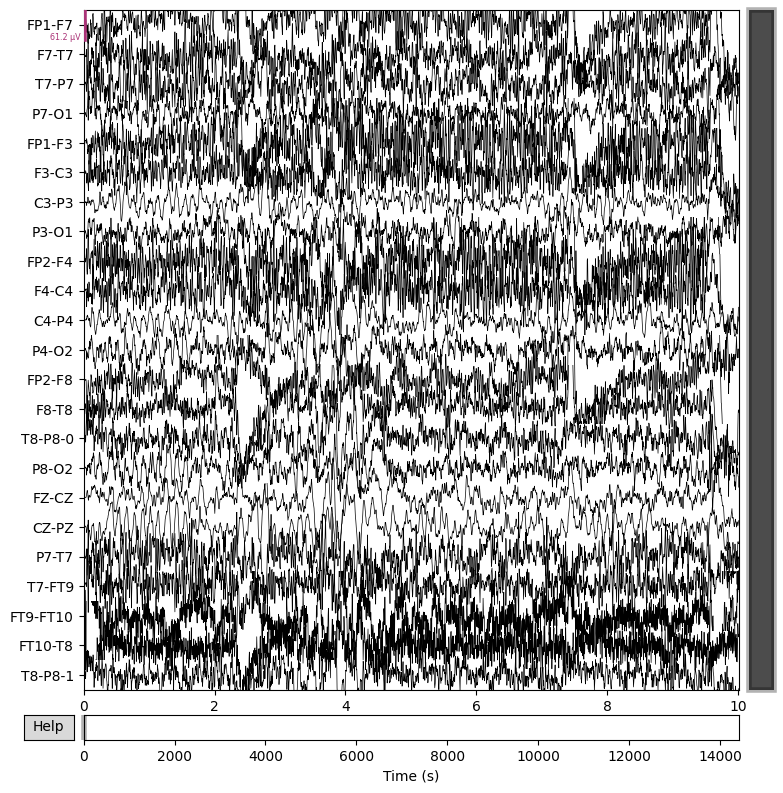

In [ ]:
import matplotlib.pyplot as plt

# Charger le fichier EDF
raw = mne.io.read_raw_edf('chb07_01.edf')

# Afficher les informations du fichier
print(raw.info)

# Afficher les premières secondes des données
print(raw.get_data(start=0, stop=10))  # Afficher les données des 10 premières secondes

# Extraire les données et les temps
data, times = raw[:, :]

raw.plot(n_channels=len(raw.ch_names), title='Données de chaque canal', scalings='auto')

In [6]:
# Initialisation des listes pour stocker les informations
seizure_presence = {}

# Chemin d'accès au fichier
file_path = "chb04-summary.txt"

# Ouvrir et lire le fichier
is_seizure = False
all_files_str = []
seizure_start = 0
with open(file_path, "r") as file:
    # Lire chaque ligne du fichier
    for line in file:
        # Traiter la ligne actuelle
        if line.strip():
            if "File Name:" in line:
              start = len("File Name: ")
              all_files_str.append(str(line[start:len(line)-1]))
            # elif "Number of Seizures in File:" in line:
            #   start = len("Number of Seizures in File: ")
            #   number_of_seizure = int(line[start:len(line)-2])
            #   if number_of_seizure == 0:
            #     is_seizure = False
            #   else:
            #     is_seizure = True
            elif ("Seizure" in line) and ("Start Time: " in line):
              if line[len("Seizure S")-1] == "S":
                start = len("Seizure Start Time: ")
              else:
                start = len("Seizure 1 Start Time: ")
              end = len(" seconds")+1
              seizure_start = int(line[start:len(line)-end])
            elif ("Seizure"in line) and ("End Time: " in line):
              if line[len("Seizure E")-1] == "E":
                start = len("Seizure End Time: ")
              else:
                start = len("Seizure 1 End Time: ")
              end = len(" seconds")+1
              seizure_end = int(line[start:len(line)-end])
              if not all_files_str[len(all_files_str)-1] in seizure_presence.keys():
                seizure_presence[all_files_str[len(all_files_str)-1]] = []
              seizure_presence[all_files_str[len(all_files_str)-1]].append((seizure_start, seizure_end))


print(all_files_str)
print(seizure_presence)

['chb04_01.edf', 'chb04_02.edf', 'chb04_03.edf', 'chb04_04.edf', 'chb04_05.edf', 'chb04_06.edf', 'chb04_07.edf', 'chb04_08.edf', 'chb04_09.edf', 'chb04_10.edf', 'chb04_11.edf', 'chb04_12.edf', 'chb04_13.edf', 'chb04_14.edf', 'chb04_15.edf', 'chb04_16.edf', 'chb04_17.edf', 'chb04_18.edf', 'chb04_19.edf', 'chb04_21.edf', 'chb04_22.edf', 'chb04_23.edf', 'chb04_24.edf', 'chb04_25.edf', 'chb04_26.edf', 'chb04_27.edf', 'chb04_28.edf', 'chb04_29.edf', 'chb04_30.edf', 'chb04_31.edf', 'chb04_32.edf', 'chb04_33.edf', 'chb04_34.edf', 'chb04_35.edf', 'chb04_36.edf', 'chb04_37.edf', 'chb04_38.edf', 'chb04_39.edf', 'chb04_40.edf', 'chb04_41.edf', 'chb04_42.edf', 'chb04_43.edf']
{'chb04_05.edf': [(7804, 7853)], 'chb04_08.edf': [(6446, 6557)], 'chb04_28.edf': [(1679, 1781), (3782, 3898)]}


In [7]:
def seperate_data_intervals(file_str, seizure_presence):
  # Durée de chaque intervalle en secondes (5 minutes)
  interval_duration = 5 * 60

  raw = mne.io.read_raw_edf(file_str)
  data, times = raw[:, :]
  total_duration = raw.times[-1] # en secondes

  # Nombre total d'intervalle de 10 minutes
  num_intervals = int(total_duration / interval_duration)
  labels = []
  data = []

  # Diviser les données en intervalles de 10 minutes
  for i in range(num_intervals):
      # Calculer le temps de début et de fin de chaque intervalle
      start_time = i * interval_duration
      end_time = (i + 1) * interval_duration

      # Convertir le temps en indice
      start_idx = raw.time_as_index(start_time)
      end_idx = raw.time_as_index(end_time)

      # Extraire les données de l'intervalle
      interval_data, interval_times = raw[:, start_idx:end_idx]
      data.append(interval_data)
      if file_str in seizure_presence.keys():
        is_seizure = False
        for start_seizure, end_seizure in seizure_presence[file_str]:
          if (start_seizure >= start_time and start_seizure <= end_time) or (end_seizure >= start_time and end_seizure <= end_time) or (start_seizure <= start_time and end_seizure >= end_time):
            is_seizure = True
            break
        if is_seizure:
          labels.append(1)
        else:
          labels.append(0)
      else:
        labels.append(0)
  return data, labels

In [10]:
data = []
labels = []
taille = 0
for file in all_files_str:
  interval_data, label = seperate_data_intervals(file, seizure_presence)
  for i in range(len(interval_data)):
    data.append(interval_data[i])
    labels.append(label[i])

Extracting EDF parameters from /content/chb04_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-7-4ff7c529f88d>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_str)


Extracting EDF parameters from /content/chb04_02.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: '/content/chb04_02.edf'

In [ ]:
print(len(data))
print(len(data[0]))
print(len(data[0][0]))

790
23
76800
